In [2]:
import numpy as np
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

matplotlib.rcParams['figure.figsize'] = (12, 8)

#### Dataset 0

In [3]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

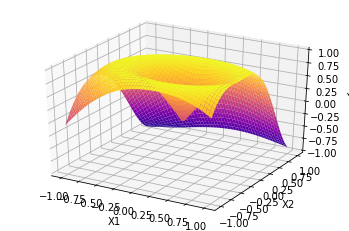

In [4]:
%matplotlib inline

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
# ax.scatter(X1, X2, Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

#### Dataset 1

In [5]:
# The two-dimensional domain of the fit.....
########https://scipython.com/blog/non-linear-least-squares-fitting-of-a-two-dimensional-data/#########
x1min, x1max, nx1 = -5, 4, 75
x2min, x2max, nx2 = -3, 7, 75
x1, x2 = np.linspace(x1min, x1max, nx1), np.linspace(x2min, x2max, nx2)
X1, X2 = np.meshgrid(x1, x2)

# Our function to fit is going to be a sum of two-dimensional Gaussians
def gaussian(x1, x2, x10, x20, x1alpha, x2alpha, A):
    return A * np.exp( -((x1-x10)/x1alpha)**2 -((x2-x20)/x2alpha)**2)

# A list of the Gaussian parameters: x10, x20, x1alpha, x2alpha, A
gprms = [(0, 2, 2.5, 5.4, 1.5),
         (-1, 4, 6, 2.5, 1.8),
         (-3, -0.5, 1, 2, 4),
         (3, 0.5, 2, 1, 5)
        ]

# Standard deviation of normally-distributed noise to add in generating
# our test function to fit.
# The function to be fit is Z.
Y = np.zeros(X1.shape)
for p in gprms:
    Y += gaussian(X1, X2, *p)
### Adding noise to the data
# noise_sigma = 0.1
# Z += noise_sigma * np.random.randn(*Z.shape)

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

## reusing the variable name
x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

# Plot the 3D figure of the fitted function and the residuals.
%matplotlib tk

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
# ax.set_zlim(0,np.max(Y)+2)
plt.show()

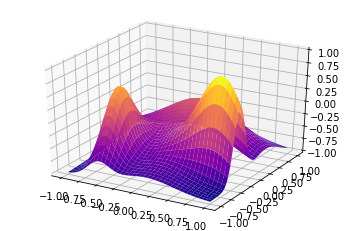

In [6]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
# ax.set_zlim(0,np.max(Z)+2)
plt.show()

### Using Splines

In [7]:
xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)
linear = tnn.WeightsLayer(2,2, optimizer=tnn.SGD(learning_rate=0.03))
splines = tsp.SplineMatrixLayer(2, 1, max_points=2)
splines._increase_pieces_(increase_by = 20)

In [8]:
%matplotlib tk

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    a1 = linear.forward(xx)
    yout = splines.forward(a1)
    dy = yout - yy
    da1 = splines.backward(dy)
    dx = linear.backward(da1)
    
    splines.update()
    linear.update()

    if epoch%100 == 0:
        splines._maintain_good_spline_()
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
#         ax.plot_surface(X1, X2, Y, cmap='plasma')

        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.6663748696398977


100 Error =  0.12598605064249424


200 Error =  0.10248189951245254


300 Error =  0.08978729344037462


400 Error =  0.07886020550976315


500 Error =  0.07197976988907173


600 Error =  0.06736110102209514


700 Error =  0.06435000570625628


800 Error =  0.06215938099523996


900 Error =  0.06056766274366775


1000 Error =  0.0593547066977059


1100 Error =  0.05639350740751753


1200 Error =  0.05569338139171459


1300 Error =  0.05516500619985641


1400 Error =  0.05474125033184371


1500 Error =  0.05457345324080061


1600 Error =  0.054287159983363975


1700 Error =  0.05405576519606036


1800 Error =  0.053784944574021956


1900 Error =  0.05385522900379775


2000 Error =  0.05368965273609723


2100 Error =  0.05357353430811438


2200 Error =  0.05349687832959342


2300 Error =  0.05341951877282383


2400 Error =  0.05336008803097351


2500 Error =  0.05331145590987582


2600 Error =  0.05326030131300533


2700 Error =  0.05323792762914106


2800

TclError: invalid command name "pyimage29"

In [19]:
splines._increase_pieces_(increase_by = 1)

In [9]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

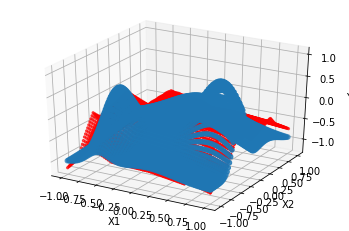

In [10]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Using Neural Network

In [11]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

n_hidden = 15
net = tnn.AutoForm(new_layers=True)
layer1 = tnn.NonLinearLayer(2, n_hidden, activation=tnn.Relu(), optimizer=tnn.Adam())
layer2 = tnn.LinearLayer(n_hidden, 1, optimizer=tnn.Adam())


fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.5445699441285182


100 Error =  0.06005164394701981


200 Error =  0.04215458540354369


300 Error =  0.03670852059819316


400 Error =  0.03239075520605079


500 Error =  0.028119956278077604


600 Error =  0.02427906137699044


700 Error =  0.021114237806372955


800 Error =  0.018861338598028216


900 Error =  0.01735281604125253


1000 Error =  0.016320934932336686


1100 Error =  0.014923305278532863


1200 Error =  0.013706378804856775


1300 Error =  0.012787968914383873


1400 Error =  0.012018016287345137


1500 Error =  0.010333075275698215


1600 Error =  0.009372161559485061


1700 Error =  0.008865832158146712


1800 Error =  0.00845721958661813


1900 Error =  0.008237208519567699


2000 Error =  0.008054754355353008


2100 Error =  0.007926882148506963


2200 Error =  0.007777358995341001


2300 Error =  0.007683802172119003


2400 Error =  0.007744787051015106


2500 Error =  0.00759138594322739


2600 Error =  0.007785939913223303


2700 Error =  0.0074816

TclError: invalid command name "pyimage49"

In [12]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

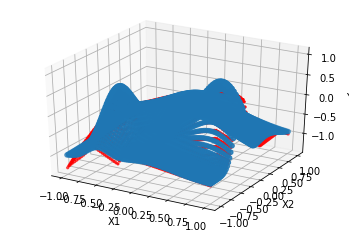

In [13]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()